In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

# Анализ XOR(4)

In [39]:
def read_results(filename, show=False):
    # read data
    df = pd.read_parquet(filename)
    history_dict = df.T.to_dict()
    counter = df['success'].value_counts().to_dict()
    if True not in counter:
        counter[True] = 0
    if show:
        display(df.head())
    
    return df, history_dict, counter

## Pie

In [40]:
def prepare_pie(counter):
    counts = [counter[key] for key in sorted(counter.keys(), reverse=True)]
    labels = list(map(lambda x: 'success' if x else 'fail', sorted(counter.keys(), reverse=True)))
    colors = {'success': 'tab:green',
              'fail': 'tab:red'}
    return counts, labels, colors

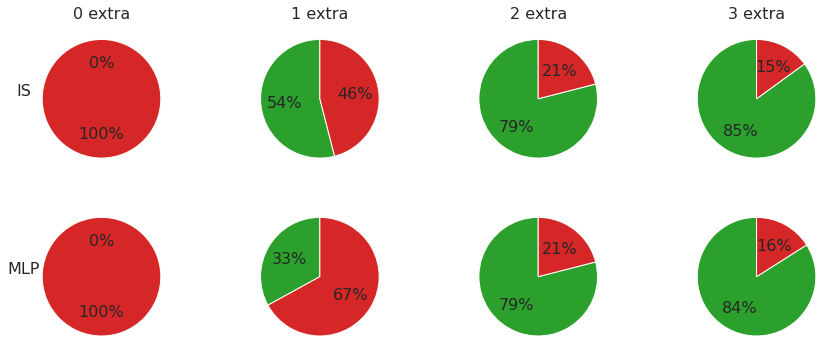

In [41]:
results_path = 'runs_results/xor_4/'

filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 6))
for i in range(len(filenames)):
    _, _, counter = read_results(results_path + filenames[i])
    counts, labels, colors = prepare_pie(counter)
    plt.subplot(2, 4, i+1)
    plt.pie(x=counts, 
            # labels=labels,
            colors=[colors[key] for key in labels],
            startangle=90,
            autopct='%.0f%%',
            textprops={'fontsize': 16})
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16,)

## Loss plots

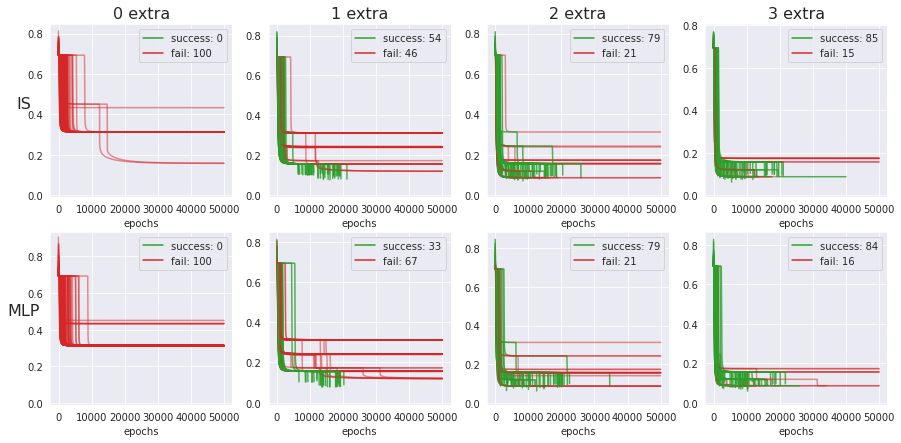

In [42]:
filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 7))
for i in range(len(filenames)):
    _, history_dict, counter = read_results(results_path + filenames[i])

    legend_elements = [Line2D([0], [0], color='tab:green', label=f"success: {counter[True]}"),
                       Line2D([0], [0], color='tab:red', label=f"fail: {counter[False]}")]

    plt.subplot(2, 4, i+1)
    for j in history_dict:
        color = 'tab:green' if history_dict[j]['success'] else 'tab:red'
        alpha = 0.8 if history_dict[j]['success'] else 0.5
        plt.plot(history_dict[j]['history_loss'], color=color, alpha=alpha)
    plt.legend(handles=legend_elements)
    plt.ylim(-0.01)
    plt.xlabel('epochs')
    
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16)
plt.show()

## History length statistics

In [44]:
def get_success_len_stat(df):
    stat_succ_hist_len = df[df['success']]['history_len'].describe()
    
    return stat_succ_hist_len

In [45]:
stat_dict = {}
filenames = ['run_is_0_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_3_extra.parquet']

for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    
    name = filenames[i][4:-8]
    
    stats = get_success_len_stat(df)
    
    stat_dict[name] = stats
    
full_stat = pd.DataFrame(data=stat_dict,
                         index = stat_dict['is_0_extra'].index)
display(full_stat)
    
    

,is_0_extra,mlp_0_extra,is_1_extra,mlp_1_extra,is_2_extra,mlp_2_extra,is_3_extra,mlp_3_extra
count,0.0,0.0,54.000000,33.000000,79.000000,79.000000,85.000000,84.000000
mean,NaN,NaN,13190.574074,14536.666667,8813.253165,10726.379747,7204.129412,7398.273810
std,NaN,NaN,4092.096946,3598.796419,5520.975472,7059.543951,6901.899657,5921.835224
min,NaN,NaN,6440.000000,6680.000000,796.000000,706.000000,321.000000,302.000000
25%,NaN,NaN,9696.500000,12118.000000,5011.000000,4960.000000,1931.000000,1852.000000
50%,NaN,NaN,13395.500000,13945.000000,7003.000000,9427.000000,5409.000000,7456.500000
75%,NaN,NaN,17089.000000,18019.000000,12644.500000,17183.500000,10139.000000,10343.250000
max,NaN,NaN,21181.000000,20248.000000,25913.000000,34610.000000,40032.000000,26065.000000


## History lengths distribution

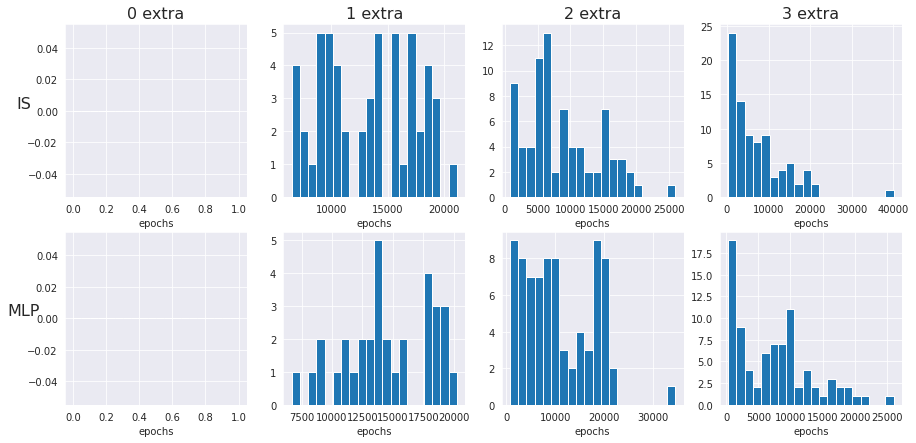

In [46]:
filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 7))
for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    plt.subplot(2, 4, i+1)
    df[df['success']]['history_len'].hist(bins=20)
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16)
    plt.xlabel('epochs')

In [47]:
filenames = ['run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

hist_len = []
extra = []
alg_types = []
for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    lengths = df[df['success']]['history_len'].tolist()
    num_extra = [int(filenames[i][-15:-14]) for _ in range(len(lengths))]
    
    if '_is_' in filenames[i]:
        alg_types += ['IS' for _ in range(len(lengths))]
    if '_mlp_' in filenames[i]:
        alg_types += ['MLP' for _ in range(len(lengths))]
    
    hist_len += lengths
    extra += num_extra
    
distr_df = pd.DataFrame(data={'hist_len': hist_len,
                              'extra': extra,
                              'type': alg_types})

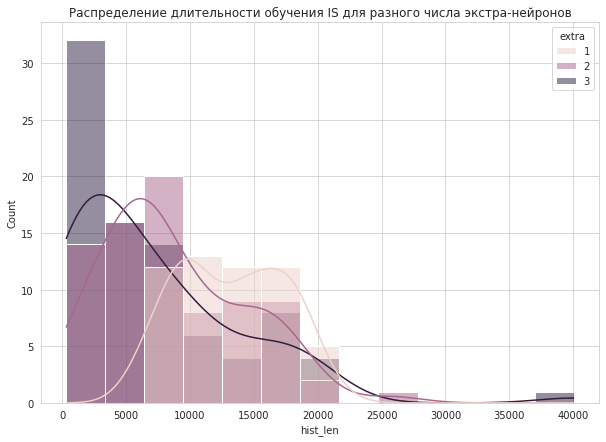

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS для разного числа экстра-нейронов')
sns.histplot(distr_df[distr_df['type'] == 'IS'], x='hist_len', hue='extra', kde=True)
plt.show()

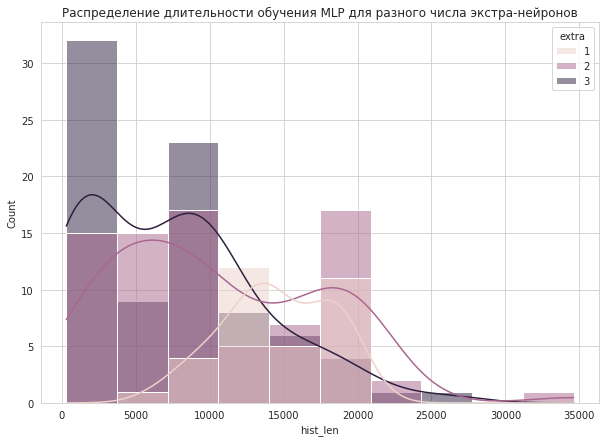

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения MLP для разного числа экстра-нейронов')
sns.histplot(distr_df[distr_df['type'] == 'MLP'], x='hist_len', hue='extra', kde=True)
plt.show()

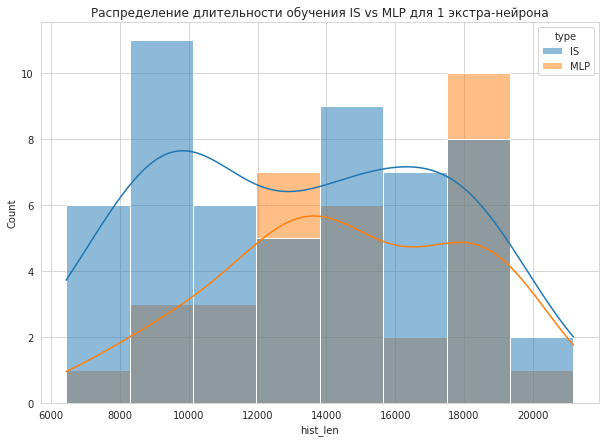

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 1 экстра-нейрона')
sns.histplot(distr_df[distr_df['extra'] == 1], x='hist_len', hue='type', kde=True)
plt.show()

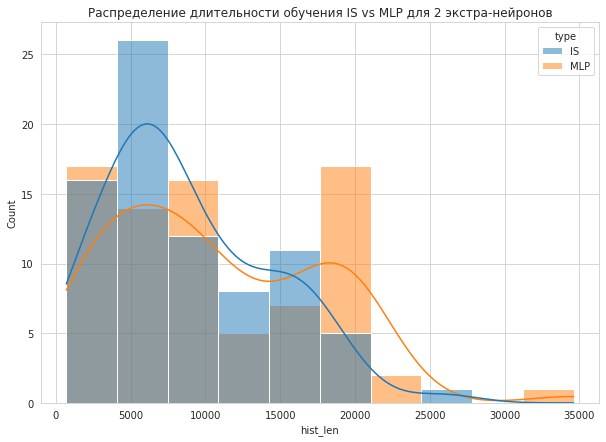

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 2 экстра-нейронов')
sns.histplot(distr_df[distr_df['extra'] == 2], x='hist_len', hue='type', kde=True)
plt.show()

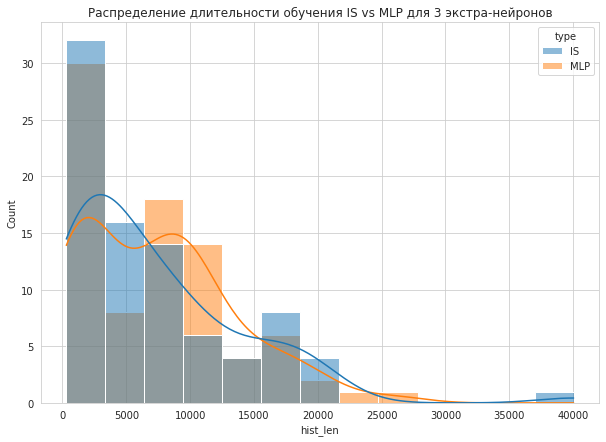

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 3 экстра-нейронов')
sns.histplot(distr_df[distr_df['extra'] == 3], x='hist_len', hue='type', kde=True)
plt.show()

# Анализ XOR(2)

## Pie

In [53]:
def read_results(filename, show=False):
    # read data
    df = pd.read_csv(filename)
    history_dict = df.T.to_dict()
    counter = df['success'].value_counts().to_dict()
    if True not in counter:
        counter[True] = 0
    if show:
        display(df.head())
    
    return df, history_dict, counter

In [54]:
def prepare_pie(counter):
    counts = [counter[key] for key in sorted(counter.keys(), reverse=True)]
    labels = list(map(lambda x: 'success' if x else 'fail', sorted(counter.keys(), reverse=True)))
    colors = {'success': 'tab:green',
              'fail': 'tab:red'}
    return counts, labels, colors

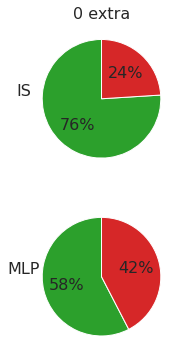

In [66]:
results_path = 'runs_results/xor_2/'

filenames = ['run_is_1000.parquet',
             'run_mlp_1000.parquet']

plt.figure(figsize = (15, 6))
for i in range(len(filenames)):
    _, _, counter = read_results(results_path + filenames[i])
    counts, labels, colors = prepare_pie(counter)
    plt.subplot(2, 1, i+1)
    plt.pie(x=counts, 
            # labels=labels,
            colors=[colors[key] for key in labels],
            startangle=90,
            autopct='%.0f%%',
            textprops={'fontsize': 16})
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
        plt.title(f'0 extra', fontsize= 16,)
    if i == 1:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    
    
plt.show()

## Loss plots

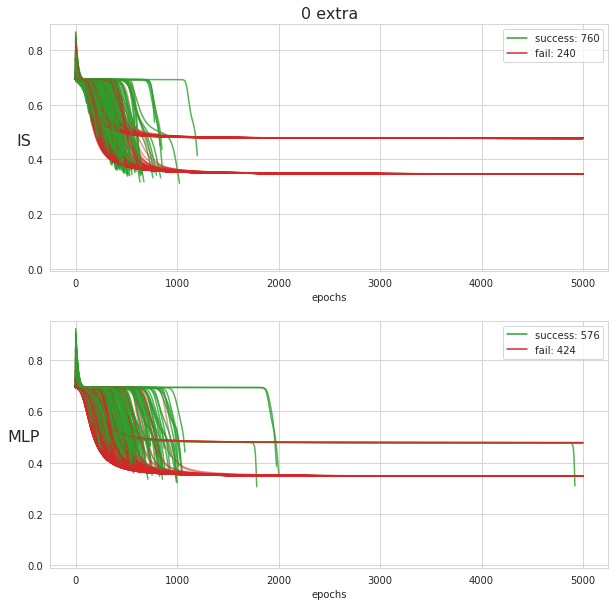

In [68]:
filenames = ['run_is_1000.parquet',
             'run_mlp_1000.parquet']

plt.figure(figsize = (10, 10))
for i in range(len(filenames)):
    _, history_dict, counter = read_results(results_path + filenames[i])

    legend_elements = [Line2D([0], [0], color='tab:green', label=f"success: {counter[True]}"),
                       Line2D([0], [0], color='tab:red', label=f"fail: {counter[False]}")]

    plt.subplot(2, 1, i+1)
    for j in history_dict:
        color = 'tab:green' if history_dict[j]['success'] else 'tab:red'
        alpha = 0.8 if history_dict[j]['success'] else 0.5
        plt.plot(json.loads(history_dict[j]['history_loss']), color=color, alpha=alpha)
    plt.legend(handles=legend_elements, loc='upper right')
    plt.ylim(-0.01)
    plt.xlabel('epochs')
    
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
        plt.title(f'0 extra', fontsize= 16,)
    if i == 1:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
        
    
plt.show()

## History length statistics

In [69]:
def get_success_len_stat(df):
    stat_succ_hist_len = df[df['success']]['history_len'].describe()
    
    return stat_succ_hist_len

In [70]:
stat_dict = {}
filenames = ['run_is_1000.parquet',
             'run_mlp_1000.parquet']

for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    
    name = filenames[i][4:-8]
    
    stats = get_success_len_stat(df)
    
    stat_dict[name] = stats
    
full_stat = pd.DataFrame(data=stat_dict,
                         index = stat_dict['is_1000'].index)
display(full_stat)
    
    

,is_1000,mlp_1000
count,760.000000,576.000000
mean,282.313158,359.164931
std,137.280780,289.703583
min,62.000000,111.000000
25%,182.000000,219.000000
50%,264.000000,300.500000
75%,353.500000,398.500000
max,1200.000000,4921.000000


In [92]:
df, _, _ = read_results(results_path + filenames[0])
lengths_is = df[df['success']==True]['history_len'].values

df, _, _ = read_results(results_path + filenames[1])
lengths_mlp = df[df['success']==True]['history_len'].values

In [93]:
from scipy import stats as sts

In [94]:
sts.ttest_ind(lengths_is, lengths_mlp, alternative='less')

Ttest_indResult(statistic=-6.423747460756754, pvalue=9.226370665910856e-11)

In [116]:
sts.mannwhitneyu(lengths_is, lengths_mlp, alternative='less')

MannwhitneyuResult(statistic=178917.0, pvalue=5.258159071703432e-09)

In [95]:
lengths_is.mean(), lengths_mlp.mean()

(282.31315789473683, 359.16493055555554)

## History lengths distribution

In [99]:
import numpy as np

In [104]:
alg_types = ['IS' for _ in range(len(lengths_is))] + ['MLP' for _ in range(len(lengths_mlp))]
hist_len = np.concatenate((lengths_is, lengths_mlp))

distr_df = pd.DataFrame(data={'hist_len': hist_len,
                              'type': alg_types})
distr_df[distr_df['hist_len']<4000]

,hist_len,type
0,397,IS
1,484,IS
2,72,IS
3,372,IS
4,357,IS
...,...,...
1331,250,MLP
1332,443,MLP
1333,246,MLP
1334,609,MLP


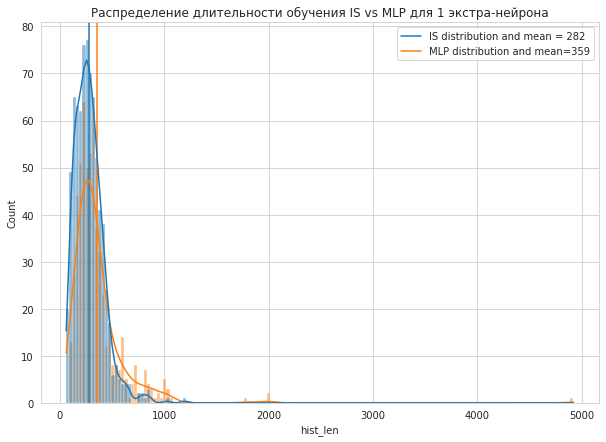

In [124]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 1 экстра-нейрона')
plt.axvline(lengths_is.mean(), color='tab:blue', label=f'IS distribution and mean = {lengths_is.mean():.0f}')
plt.axvline(lengths_mlp.mean(), color='tab:orange', label=f'MLP distribution and mean={lengths_mlp.mean():.0f}')
sns.histplot(distr_df, x='hist_len', hue='type', kde=True)
plt.legend()
plt.show()